# EDA

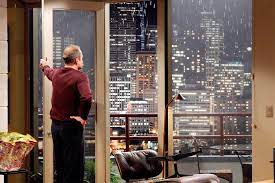

#### Import libraries

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#import folium


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Load files needed for the EDA

In [3]:
df_sales = pd.read_csv("data/eda_sales.csv")
df_details = pd.read_csv("data/eda_details.csv")

In [4]:
df_sales

,date,price,house_id,id
0,2014-10-13,221900.000,7129300520,1
1,2014-12-09,538000.000,6414100192,2
2,2015-02-25,180000.000,5631500400,3
3,2014-12-09,604000.000,2487200875,4
4,2015-02-18,510000.000,1954400510,5
...,...,...,...,...
21592,2014-05-21,360000.000,263000018,21593
21593,2015-02-23,400000.000,6600060120,21594
21594,2014-06-23,402101.000,1523300141,21595
21595,2015-01-16,400000.000,291310100,21596


In [6]:
df_details = df_details.rename(columns={"id": "house_id"})
df_details

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,980.000,0.000,1954,0.000,98188,47.436,-122.290,980.000,8125.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,993002177,3.000,2.500,1380.000,1547.000,3.000,0.000,0.000,3,8,1380.000,0.000,2000,NaN,98103,47.691,-122.341,1380.000,1465.000
21416,993002225,3.000,2.250,1520.000,1245.000,3.000,NaN,0.000,3,8,1520.000,0.000,2004,0.000,98103,47.691,-122.340,1520.000,1470.000
21417,993002247,3.000,2.250,1550.000,1469.000,3.000,0.000,0.000,3,8,1550.000,0.000,2004,0.000,98103,47.691,-122.341,1520.000,1465.000
21418,993002325,2.000,1.500,950.000,4625.000,1.000,0.000,0.000,4,7,950.000,0.000,1949,NaN,98103,47.691,-122.340,1440.000,4625.000


### Combine files and show floats with 2 decimal places

In [125]:
# Show floats with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight')

df_merged = pd.merge(df_details, df_sales, on="house_id", how="outer")
df_merged

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,id
0,1000102,6.00,3.00,"2,400.00","9,373.00",2.00,NaN,0.00,3,7,...,1991,0.00,98002,47.33,-122.21,"2,060.00","7,316.00",2014-09-16,"280,000.00",2495
1,1000102,6.00,3.00,"2,400.00","9,373.00",2.00,NaN,0.00,3,7,...,1991,0.00,98002,47.33,-122.21,"2,060.00","7,316.00",2015-04-22,"300,000.00",2496
2,1200019,4.00,1.75,"2,060.00","26,036.00",1.00,NaN,0.00,4,8,...,1947,0.00,98166,47.44,-122.35,"2,590.00","21,891.00",2014-05-08,"647,500.00",6730
3,1200021,3.00,1.00,"1,460.00","43,000.00",1.00,0.00,0.00,3,7,...,1952,0.00,98166,47.44,-122.35,"2,250.00","20,023.00",2014-08-11,"400,000.00",8405
4,2800031,3.00,1.00,"1,430.00","7,599.00",1.50,0.00,0.00,4,6,...,1930,0.00,98168,47.48,-122.27,"1,290.00","10,320.00",2015-04-01,"235,000.00",8801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,9842300095,5.00,2.00,"1,600.00","4,168.00",1.50,0.00,0.00,3,7,...,1927,0.00,98126,47.53,-122.38,"1,190.00","4,168.00",2014-07-25,"365,000.00",16724
21593,9842300485,2.00,1.00,"1,040.00","7,372.00",1.00,0.00,0.00,5,7,...,1939,0.00,98126,47.53,-122.38,"1,930.00","5,150.00",2015-03-11,"380,000.00",3258
21594,9842300540,3.00,1.00,"1,100.00","4,128.00",1.00,0.00,0.00,4,7,...,1942,NaN,98126,47.53,-122.38,"1,510.00","4,538.00",2014-06-24,"339,000.00",7615
21595,9895000040,2.00,1.75,"1,410.00","1,005.00",1.50,0.00,0.00,3,9,...,2011,0.00,98027,47.54,-122.02,"1,440.00","1,188.00",2014-07-03,"399,900.00",20964


# Understanding the data
Examine the descriptive statistics of the dataset.
Check for missing values. Are they concentrated in some column or in some observations?
Check which features are continuous or categorical.

In [129]:
# Rename columns
df_merged = df_merged.rename(columns={"yr_built": "year_built", "yr_renovated": "year_renovated"})

# Extract year, month, day-of-week out of column date and build new column for each
df_merged['date'] = pd.to_datetime(df_merged['date'], format='ISO8601')
df_merged["date_year"]=df_merged["date"].dt.year
df_merged["date_month"]=df_merged["date"].dt.month
df_merged["date_day"]=df_merged["date"].dt.day
df_merged["date_weekday"]=df_merged["date"].dt.dayofweek

df_merged

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,date,price,id,date_year,date_month,date_weekday,date_day
0,1000102,6.00,3.00,"2,400.00","9,373.00",2.00,NaN,0.00,3,7,...,-122.21,"2,060.00","7,316.00",2014-09-16,"280,000.00",2495,2014,9,1,16
1,1000102,6.00,3.00,"2,400.00","9,373.00",2.00,NaN,0.00,3,7,...,-122.21,"2,060.00","7,316.00",2015-04-22,"300,000.00",2496,2015,4,2,22
2,1200019,4.00,1.75,"2,060.00","26,036.00",1.00,NaN,0.00,4,8,...,-122.35,"2,590.00","21,891.00",2014-05-08,"647,500.00",6730,2014,5,3,8
3,1200021,3.00,1.00,"1,460.00","43,000.00",1.00,0.00,0.00,3,7,...,-122.35,"2,250.00","20,023.00",2014-08-11,"400,000.00",8405,2014,8,0,11
4,2800031,3.00,1.00,"1,430.00","7,599.00",1.50,0.00,0.00,4,6,...,-122.27,"1,290.00","10,320.00",2015-04-01,"235,000.00",8801,2015,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,9842300095,5.00,2.00,"1,600.00","4,168.00",1.50,0.00,0.00,3,7,...,-122.38,"1,190.00","4,168.00",2014-07-25,"365,000.00",16724,2014,7,4,25
21593,9842300485,2.00,1.00,"1,040.00","7,372.00",1.00,0.00,0.00,5,7,...,-122.38,"1,930.00","5,150.00",2015-03-11,"380,000.00",3258,2015,3,2,11
21594,9842300540,3.00,1.00,"1,100.00","4,128.00",1.00,0.00,0.00,4,7,...,-122.38,"1,510.00","4,538.00",2014-06-24,"339,000.00",7615,2014,6,1,24
21595,9895000040,2.00,1.75,"1,410.00","1,005.00",1.50,0.00,0.00,3,9,...,-122.02,"1,440.00","1,188.00",2014-07-03,"399,900.00",20964,2014,7,3,3


In [130]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   house_id        21597 non-null  int64         
 1   bedrooms        21597 non-null  float64       
 2   bathrooms       21597 non-null  float64       
 3   sqft_living     21597 non-null  float64       
 4   sqft_lot        21597 non-null  float64       
 5   floors          21597 non-null  float64       
 6   waterfront      19206 non-null  float64       
 7   view            21534 non-null  float64       
 8   condition       21597 non-null  int64         
 9   grade           21597 non-null  int64         
 10  sqft_above      21597 non-null  float64       
 11  sqft_basement   21145 non-null  float64       
 12  year_built      21597 non-null  int64         
 13  year_renovated  17749 non-null  float64       
 14  zipcode         21597 non-null  int64         
 15  la

In [57]:
# Check for duplicate rows --> no duplicated rows
df_merged.duplicated().value_counts()

# Check for duplicate house IDs --> some houses were sold more than once
df_merged["house_id"].duplicated().value_counts()

house_id
False    21420
True       177
Name: count, dtype: int64

In [51]:
# display number of missing values per column
df_merged.isna().sum()

house_id             0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront        2391
view                63
condition            0
grade                0
sqft_above           0
sqft_basement      452
year_built           0
year_renovated    3848
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
date                 0
price                0
id                   0
dtype: int64

# Exploring the data

Check distributions of the continuous variables, for example by producing histograms for each of them.
Check the distributions for the categorical variables, by producing plots/tables of counts.
Look at the histograms and check for clues or patterns: can you identify groups, are the distributions skewed, do you have extreme values or outliers, where is the data centered. Do you need to remove some data?

### Boxplots of continous variables

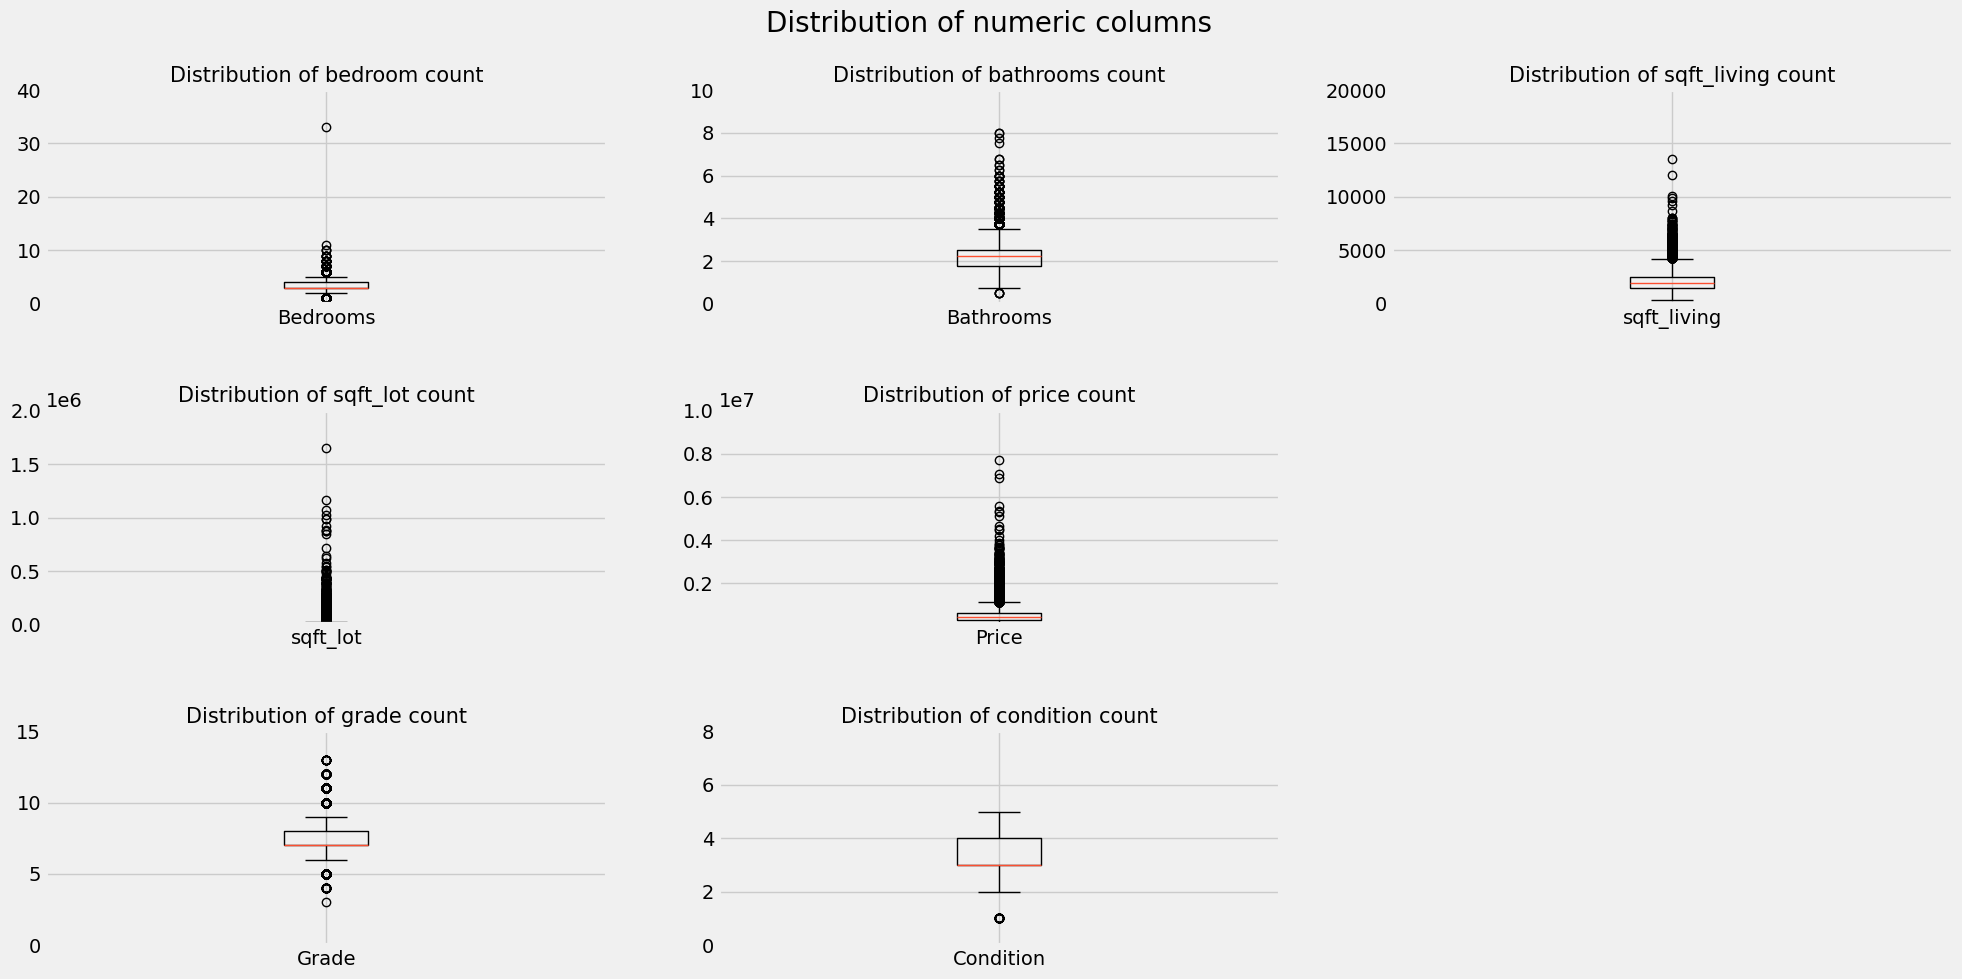

In [157]:
fig, ax = plt.subplots(3,3, figsize=(20,10)) # create subplots on 3 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].boxplot(x = df_merged['bedrooms']) 
ax[0][0].set_xticklabels(labels=["Bedrooms"])
ax[0][0].set_ylim(0,40) 
ax[0][0].set_title("Distribution of bedroom count", fontsize = 15); 

ax[0][1].boxplot(x = df_merged['bathrooms'])
ax[0][1].set_xticklabels(labels=["Bathrooms"])
ax[0][1].set_ylim(0,10)
ax[0][1].set_title("Distribution of bathrooms count", fontsize = 15);

ax[0][2].boxplot(x = df_merged['sqft_living'])
ax[0][2].set_xticklabels(labels=["sqft_living"])
ax[0][2].set_ylim(0,20000)
ax[0][2].set_title("Distribution of sqft_living count", fontsize = 15);

ax[1][0].boxplot(x = df_merged['sqft_lot'])
ax[1][0].set_xticklabels(labels=["sqft_lot"])
ax[1][0].set_ylim(0,2000000)
ax[1][0].set_title("Distribution of sqft_lot count", fontsize = 15);
                              
ax[1][1].boxplot(x = df_merged['price'])
ax[1][1].set_xticklabels(labels=["Price"])
ax[1][1].set_ylim(100000, 10000000)
ax[1][1].set_title("Distribution of price count", fontsize = 15);

ax[2][1].boxplot(x = df_merged['condition'])
ax[2][1].set_xticklabels(labels=["Condition"])
ax[2][1].set_ylim(0, 8)
ax[2][1].set_title("Distribution of condition count", fontsize = 15);

ax[2][0].boxplot(x = df_merged['grade'])
ax[2][0].set_xticklabels(labels=["Grade"])
ax[2][0].set_ylim(0, 15)
ax[2][0].set_title("Distribution of grade count", fontsize = 15);


fig.delaxes(ax[1][2]);
fig.delaxes(ax[2][2]);

### Test whether 33 bedrooms are realistic

In [153]:
df_bedroom = df_merged.query("bedrooms == 33")
df_bedroom

# 33 bedrooms in about 150 square meters (4,5 qm pro Zimmer) are unrealistic!

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,date,price,id,date_year,date_month,date_weekday,date_day
6071,2402100895,33.00,1.75,"1,620.00","6,000.00",1.00,0.00,0.00,5,7,...,-122.33,"1,330.00","4,700.00",2014-06-25,"640,000.00",15857,2014,6,2,25


#### Drop line with unrealistic data

In [183]:
df_merged = df_merged.drop([6071])

### Histograms

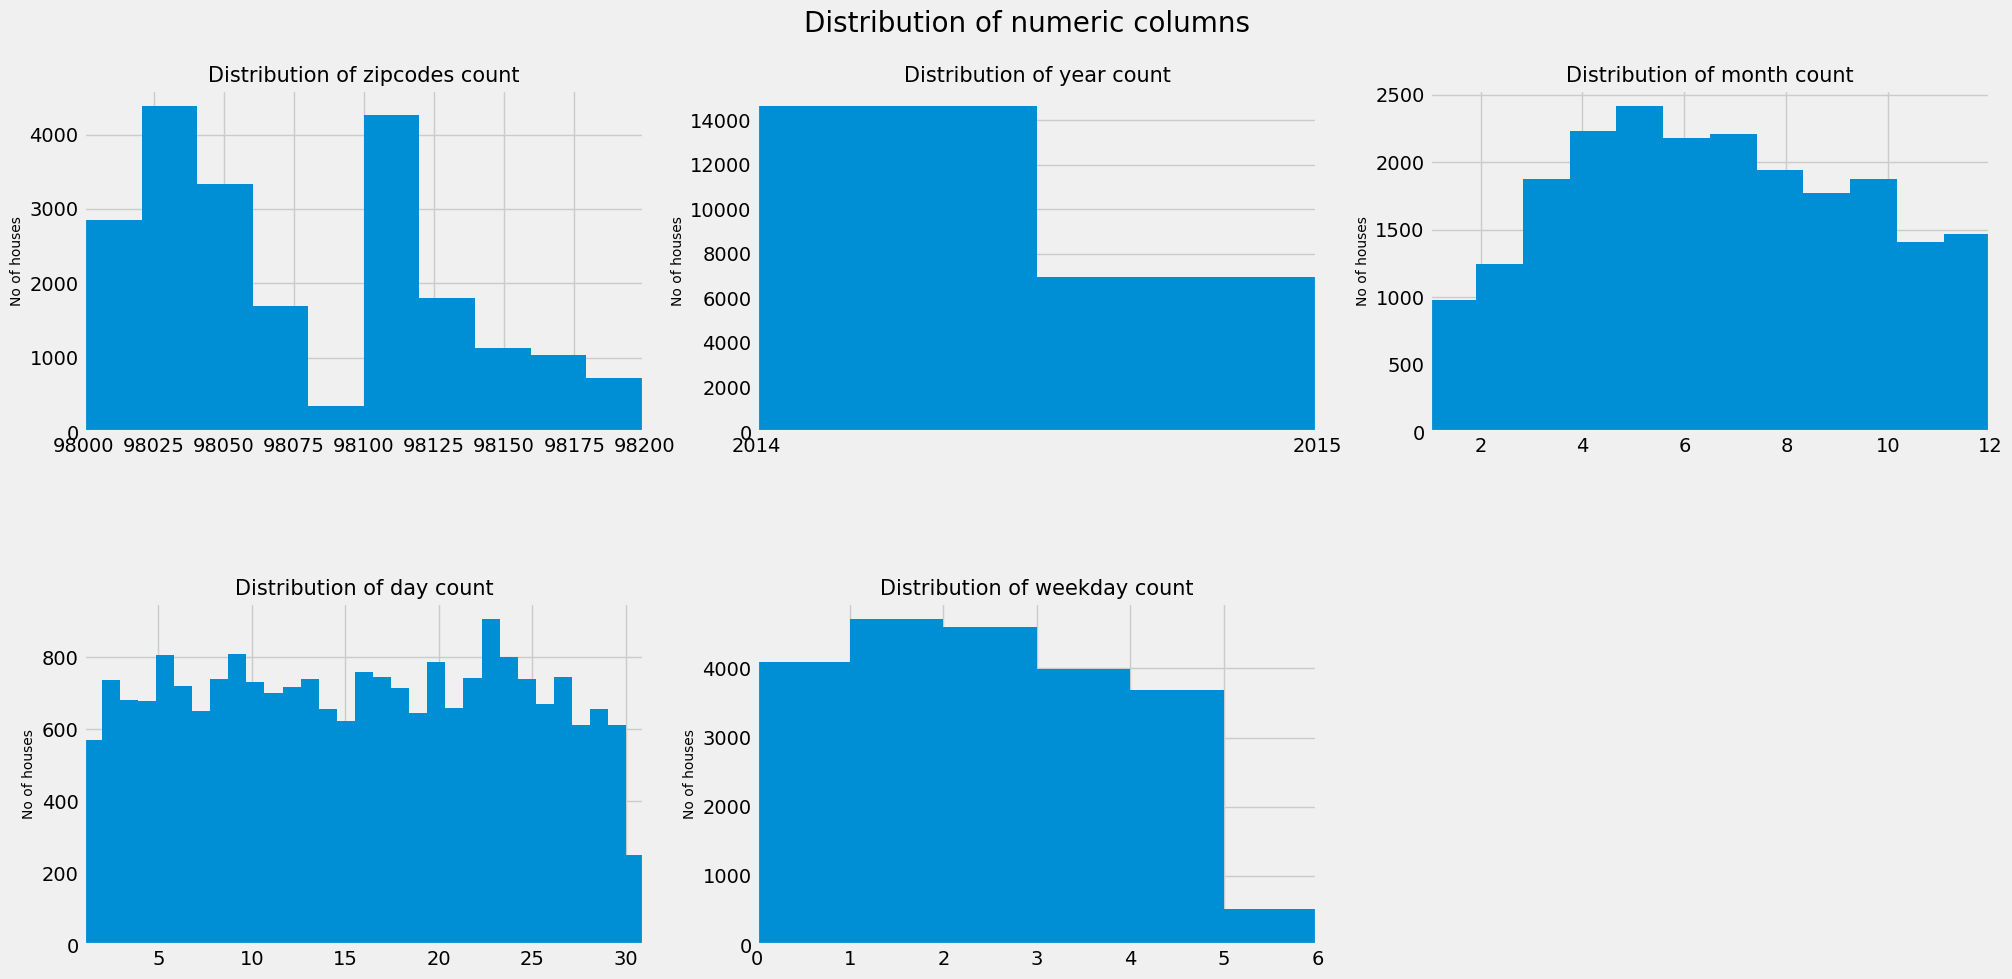

In [181]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) 
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) 

ax[0][0].hist(x=df_merged['zipcode'], bins=10) 
ax[0][0].set_ylabel("No of houses", fontsize = 10) 
ax[0][0].set_xlim(98000,98200) 
ax[0][0].set_title("Distribution of zipcodes count", fontsize = 15);

ax[0][1].hist(x= df_merged['date_year'], bins=2)
ax[0][1].set_ylabel("No of houses", fontsize = 10)
ax[0][1].set_xlim(2014, 2015)
ax[0][1].set_xticks([2014, 2015])
ax[0][1].set_title("Distribution of year count", fontsize = 15);

ax[0][2].hist(x=df_merged['date_month'], bins=12)
ax[0][2].set_ylabel("No of houses", fontsize = 10)
ax[0][2].set_xlim(1,12)
ax[0][2].set_title("Distribution of month count", fontsize = 15);

ax[1][0].hist(x=df_merged['date_day'], bins=31)
ax[1][0].set_ylabel("No of houses", fontsize = 10)
ax[1][0].set_xlim(1,31)
ax[1][0].set_title("Distribution of day count", fontsize = 15);
                              
ax[1][1].hist(x=df_merged['date_weekday'], bins=6)
ax[1][1].set_ylabel("No of houses", fontsize = 10)
ax[1][1].set_xlim(0,6)
ax[1][1].set_title("Distribution of weekday count", fontsize = 15);

fig.delaxes(ax[1][2]);